<a href="https://colab.research.google.com/github/Sakiba1705/Vision-Transformer-Approach-Melanoma-Detection/blob/main/Melanoma_Detection_using_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset**

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sakibaakter1911359","key":"4be5d3cb6a8cc5171ec15f15bc79430d"}'}

In [ ]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
!kaggle datasets download -d drscarlat/melanoma

100% 5.26G/5.26G [00:51<00:00, 94.1MB/s]
100% 5.26G/5.26G [00:52<00:00, 107MB/s] 


In [ ]:
! unzip /content/melanoma.zip

Streaming output truncated to the last 5000 lines.
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031354.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031355.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031357.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031358.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031362.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031363.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031365.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031366.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031367.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031370.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031375.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031380.jpg  
  inflating: dermmel/DermMel/train_sep/NotMelanoma/ISIC_0031382.jpg  
  inflating: dermmel/DermMel/train_sep/

In [ ]:
# Setup directory paths to train and test images
train_dir = '/content/DermMel/train_sep'
test_dir = '/content/DermMel/test'

In [ ]:
label=["Melanoma","Not Melanoma"]


print("class")
for i in range(len(label)):
  print(i,end=" ")
  print(label[i])


print("number of classes:",len(label))

class
0 Melanoma
1 Not Melanoma
number of classes: 2


# **Libraries**

In [ ]:
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model

# **ResNet50**

In [ ]:
# Define data generators for training and testing data
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2,)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(224, 224),
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    subset='validation')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(224, 224),
                                                  batch_size=128,
                                                  class_mode='categorical')

Found 8546 images belonging to 2 classes.
Found 2136 images belonging to 2 classes.
Found 3561 images belonging to 2 classes.


In [ ]:
# Load the ResNet50 model with pre-trained ImageNet weights
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

94765736/94765736 [==============================] - 1s 0us/step


Melanoma Images:


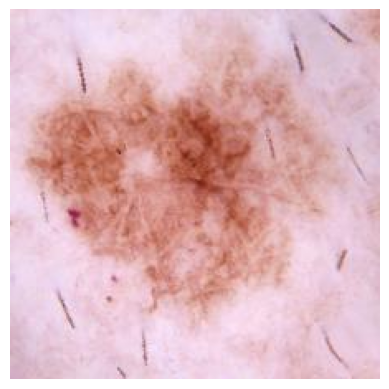

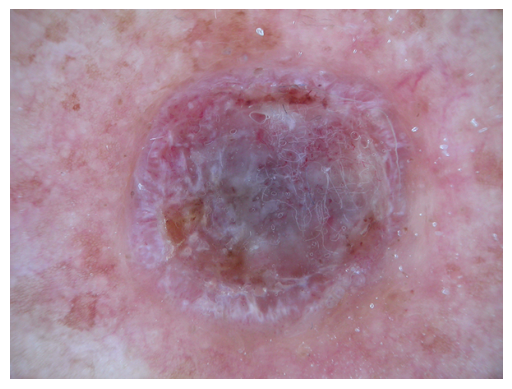

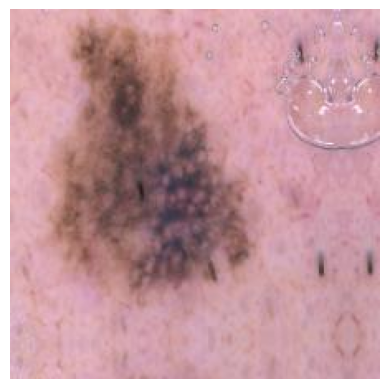

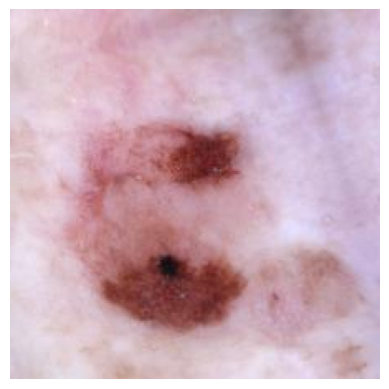

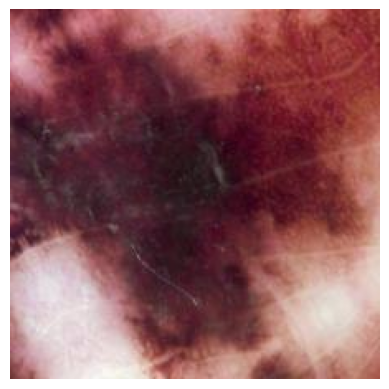

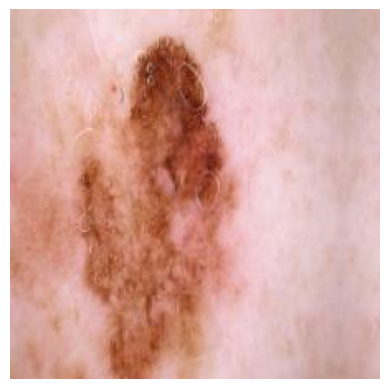

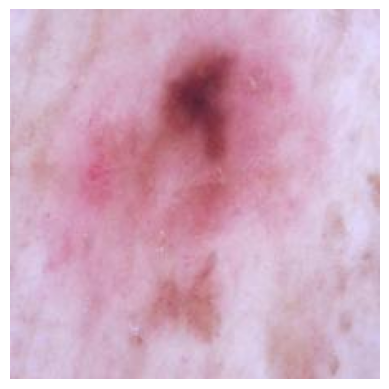

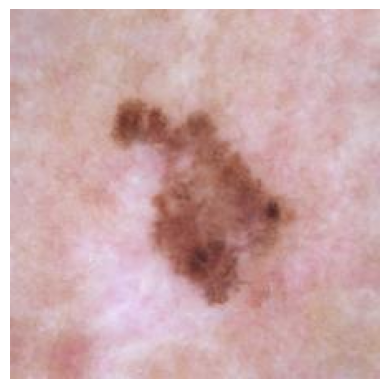

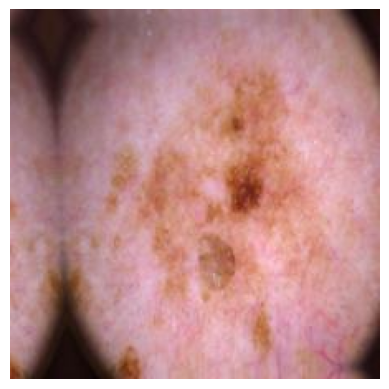

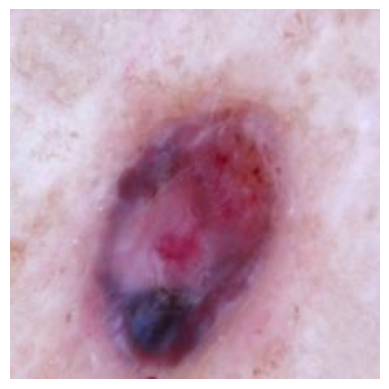

Notmelanoma Images:


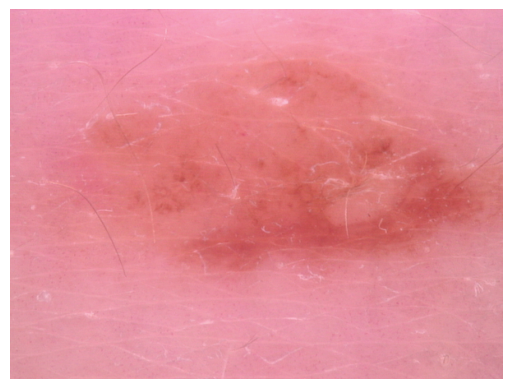

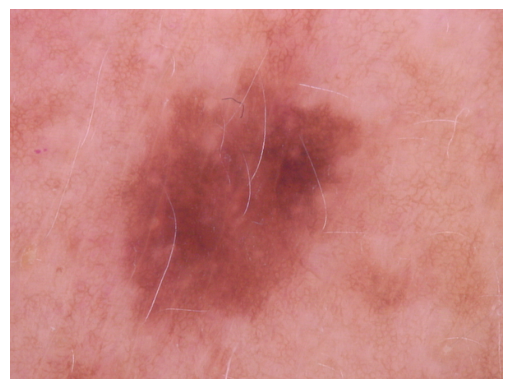

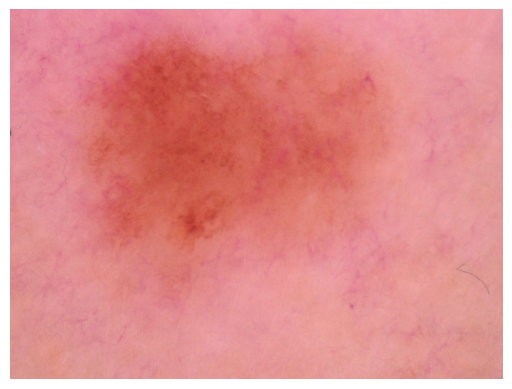

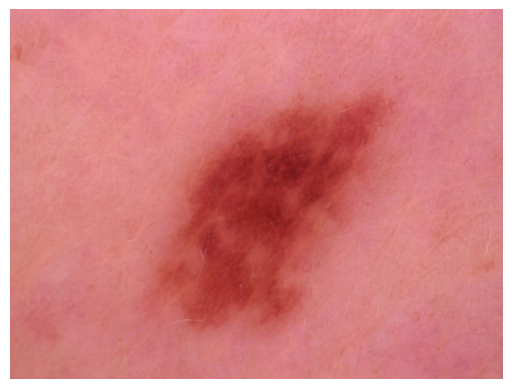

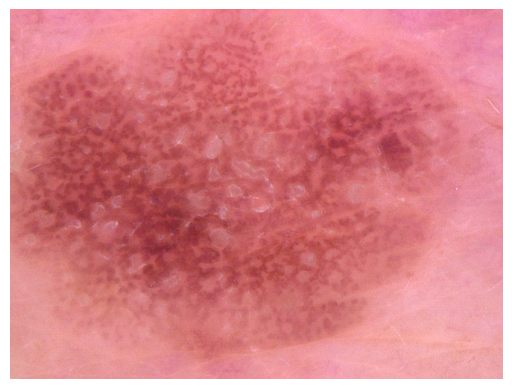

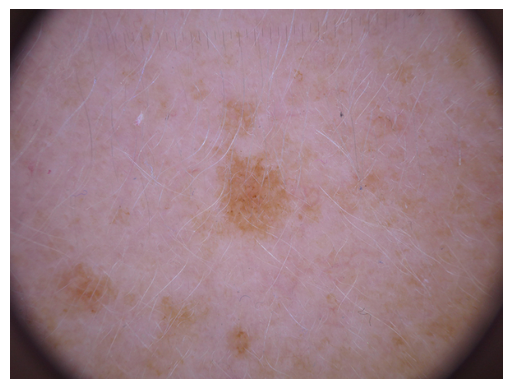

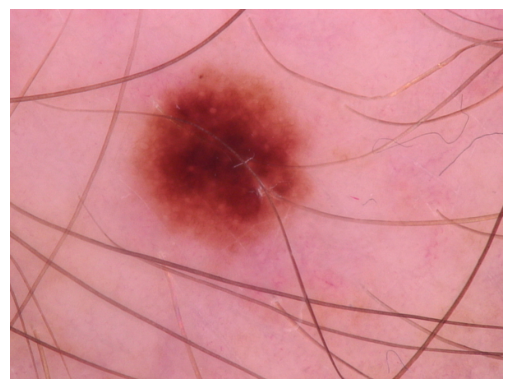

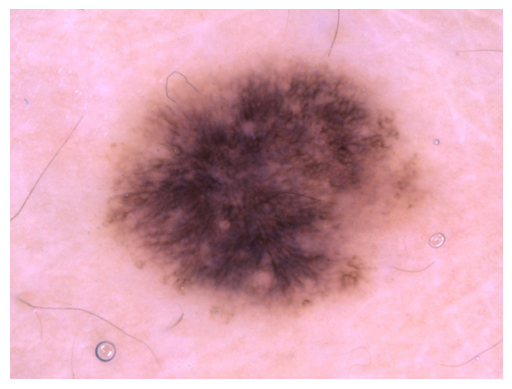

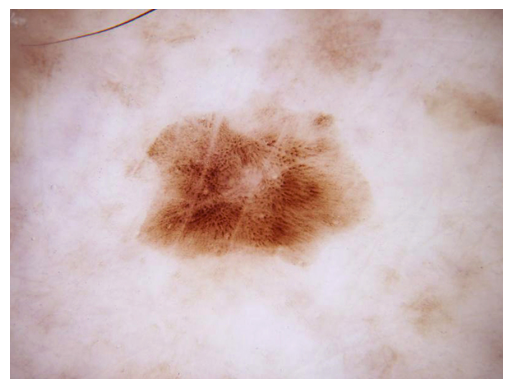

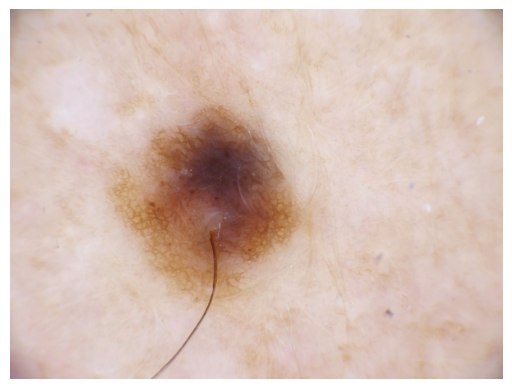

In [ ]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt

# Set the path to the dataset
data_path ='/content/DermMel/test'

# Define the classes
classes = ['Melanoma', 'NotMelanoma']

# Print 10 images of each class
for cls in classes:
    cls_path = os.path.join(data_path, cls)
    cls_images = os.listdir(cls_path)[:10]
    print(f"{cls.capitalize()} Images:")
    for img_file in cls_images:
        img_path = os.path.join(cls_path, img_file)
        img = plt.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
    #print('\n')

In [ ]:
# Add custom layers on top of the pre-trained model
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
#output layer fully connected dance layer with two neuron
predictions = Dense(2, activation='softmax')(x)

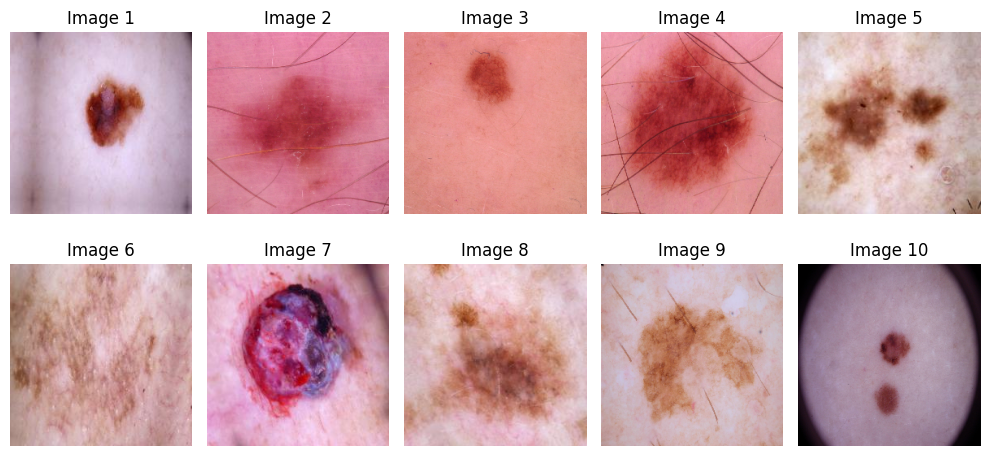

In [ ]:
import matplotlib.pyplot as plt

# Get the first 10 images from the test generator
x_test, y_test = next(test_generator)
x_test_first10 = x_test[:10]

# Plot the first 10 images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test_first10[i])
    ax.set_title("Image {}".format(i+1))
    ax.axis('off')
plt.tight_layout()
plt.show()


In [ ]:
# Combine the base ResNet50 model with the custom layers
model = Model(inputs=base_model.input, outputs=predictions)
#model.summary()

In [ ]:
# Freeze all layers in the base ResNet50 model
for layer in base_model.layers[5:]:
    layer.trainable = False
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

# **Training & Testing**

In [ ]:
# Train the model on the training data
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n // train_generator.batch_size,
                              epochs=12,
                              validation_data=val_generator,
                              validation_steps=val_generator.n // val_generator.batch_size)

<ipython-input-20-4bf81905886f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/12
66/66 [==============================] - 228s 3s/step - loss: 3.9502 - accuracy: 0.8040 - val_loss: 0.7217 - val_accuracy: 0.5000
Epoch 2/12
66/66 [==============================] - 191s 3s/step - loss: 0.2631 - accuracy: 0.8999 - val_loss: 0.7636 - val_accuracy: 0.5122
Epoch 3/12
66/66 [==============================] - 196s 3s/step - loss: 0.2226 - accuracy: 0.9102 - val_loss: 0.9739 - val_accuracy: 0.5117
Epoch 4/12
66/66 [==============================] - 187s 3s/step - loss: 0.2037 - accuracy: 0.9147 - val_loss: 1.6461 - val_accuracy: 0.5117
Epoch 5/12
66/66 [==============================] - 186s 3s/step - loss: 0.1824 - accuracy: 0.9201 - val_loss: 2.0680 - val_accuracy: 0.5156
Epoch 6/12
66/66 [==============================] - 186s 3s/step - loss: 0.1805 - accuracy: 0.9224 - val_loss: 1.9537 - val_accuracy: 0.5220
Epoch 7/12
66/66 [==============================] - 195s 3s/step - loss: 0.1706 - accuracy: 0.9235 - val_loss: 2.2254 - val_accuracy: 0.5000
Epoch 8/12
66

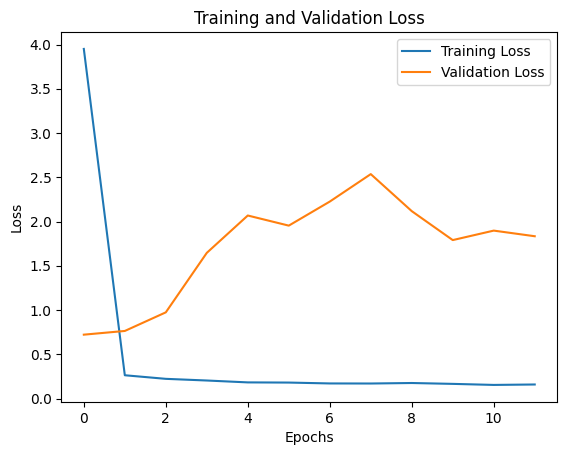

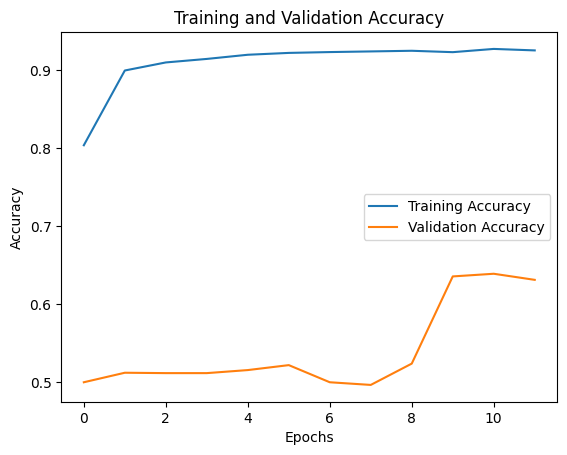

In [ ]:
# Plot the loss vs val_loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy vs val_accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the testing data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('Test Accuracy:', test_acc)
# Print the train and test loss
print('Train Loss:', history.history['loss'][-1])
print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

28/28 - 29s - loss: 2.6680 - accuracy: 0.5656 - 29s/epoch - 1s/step
Test Accuracy: 0.5655714869499207
Train Loss: 0.158729687333107
Test Loss: 2.668008804321289
Test Accuracy: 0.5655714869499207


4/4 [==============================] - 2s 71ms/step


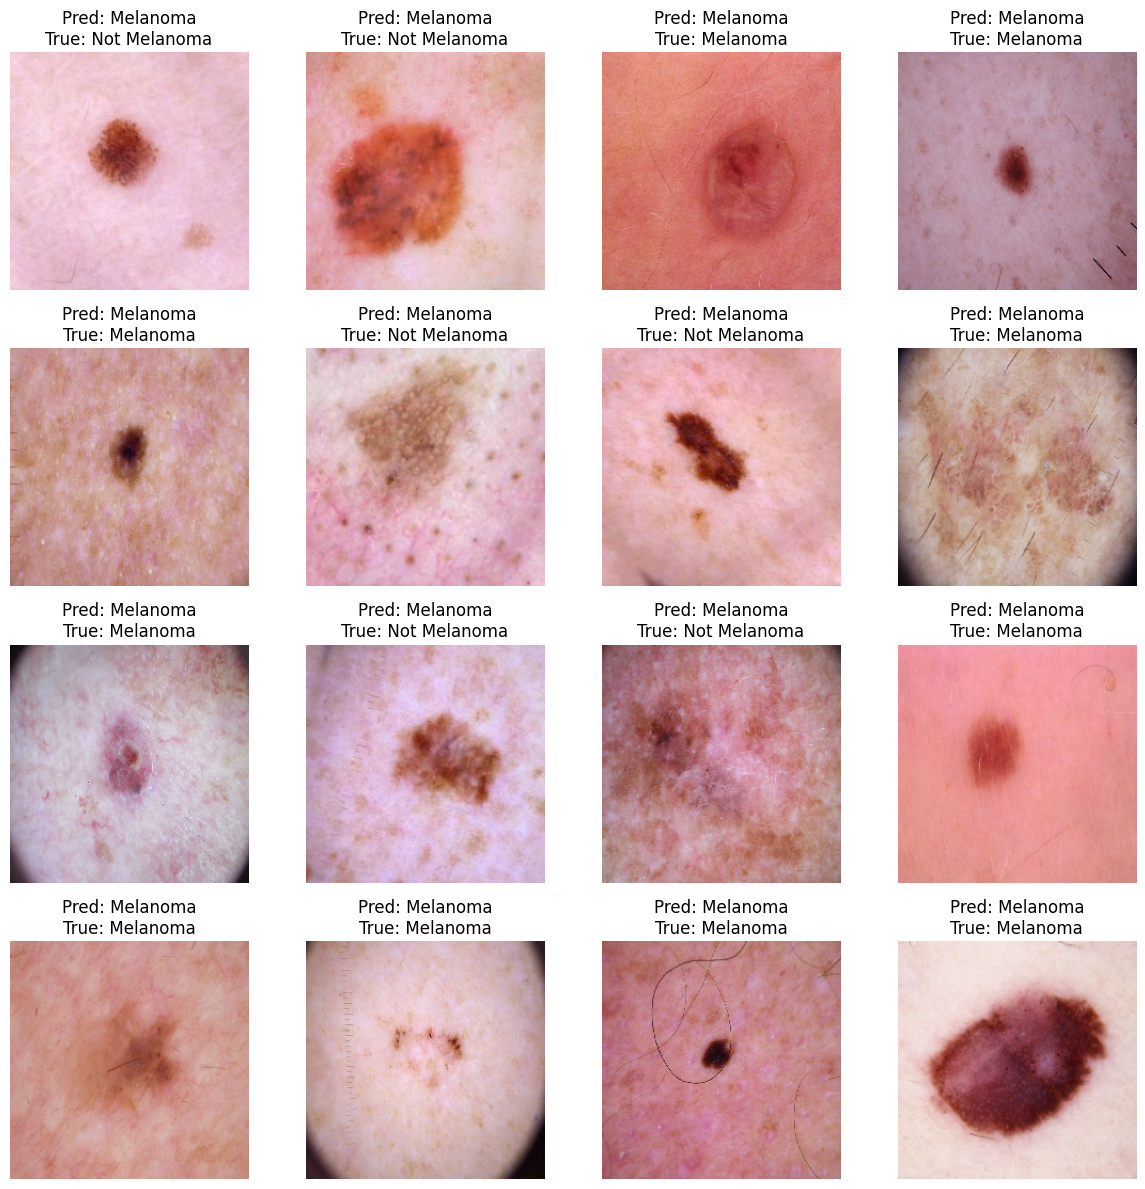

In [ ]:
import matplotlib.pyplot as plt

# Get the next batch of images from the test generator
x_test, y_test = next(test_generator)

# Predict the classes of the testing data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
label_dict = {0: 'Not Melanoma', 1: 'Melanoma'}

# Plot the images along with their predicted and actual labels
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12,12))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i])
    pred_label = label_dict[y_pred_classes[i]]
    true_label = label_dict[y_true_classes[i]]
    ax.set_title("Pred: {}\nTrue: {}".format(pred_label, true_label))
    ax.axis('off')
plt.tight_layout()
plt.show()

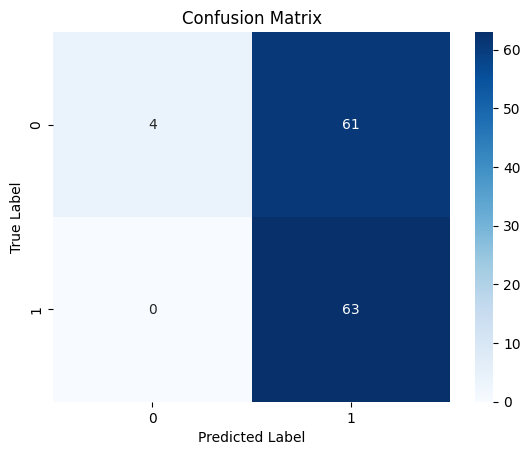

In [ ]:
# Create confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()